In [16]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import pysm3.units as u
from matplotlib.colors import LogNorm, SymLogNorm
import matplotlib.cm as cm
from cmbml.utils.get_maps import get_planck_obs_data, get_planck_noise_data
from cmbml.utils.fits_inspection import get_field_unit
from system_config import ASSETS_DIRECTORY, NOISE_DIRECTORY

In [17]:
DET = 545

In [18]:
unit_lookup = {
    'Kcmb': u.K_CMB,
}

In [19]:
# Get observations
obs_fn = get_planck_obs_data(detector=DET, assets_directory=ASSETS_DIRECTORY)
nse_fn0 = get_planck_noise_data(detector=DET, assets_directory=NOISE_DIRECTORY, realization=0)

File /data/jim/CMB_Data/Assets/Planck/HFI_SkyMap_545_2048_R3.01_full.fits exists.
File /data/jim/CMB_Data/Assets/PlanckNoise/ffp10_noise_545_full_map_mc_00000.fits exists.


In [20]:
obs = hp.read_map(obs_fn)

In [21]:
nse0 = hp.read_map(nse_fn0)

In [22]:
min_max = dict(min=-2e-1, max=2e-1)

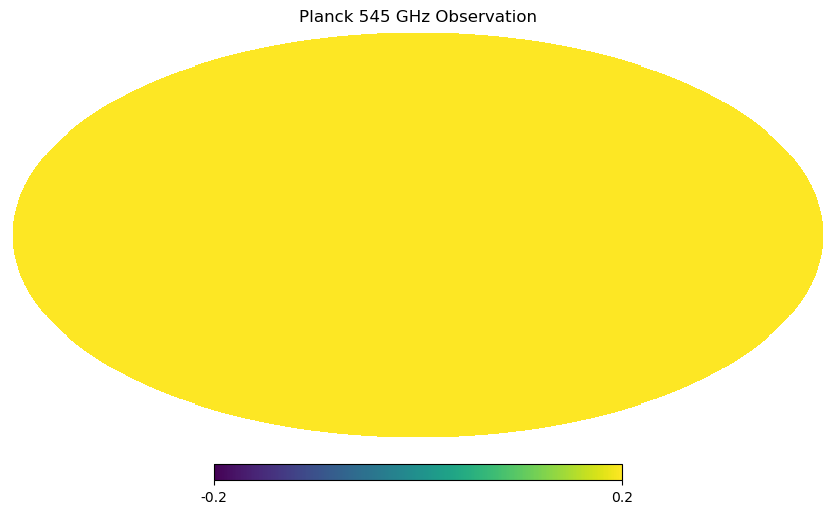

In [23]:
hp.mollview(obs, title=f"Planck {DET} GHz Observation", **min_max)

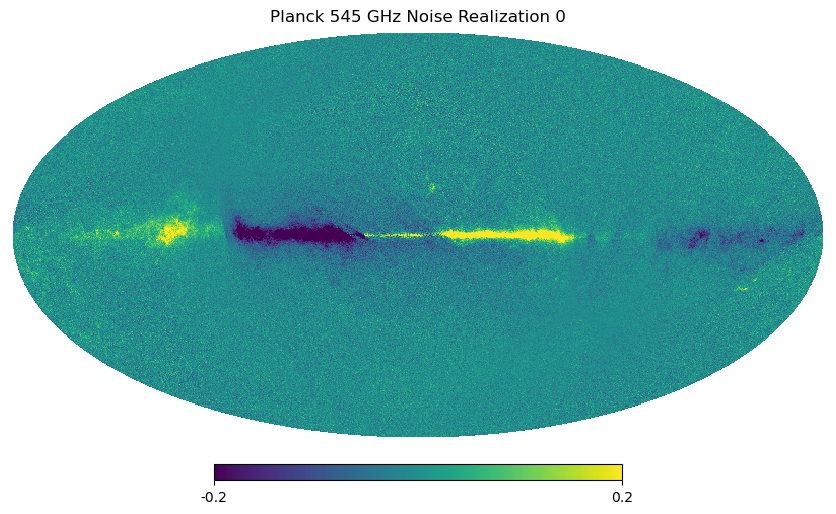

In [24]:
hp.mollview(nse0, title=f"Planck {DET} GHz Noise Realization 0", **min_max)

In [25]:
nse0_sm1 = hp.smoothing(nse0, fwhm=np.radians(1/60))

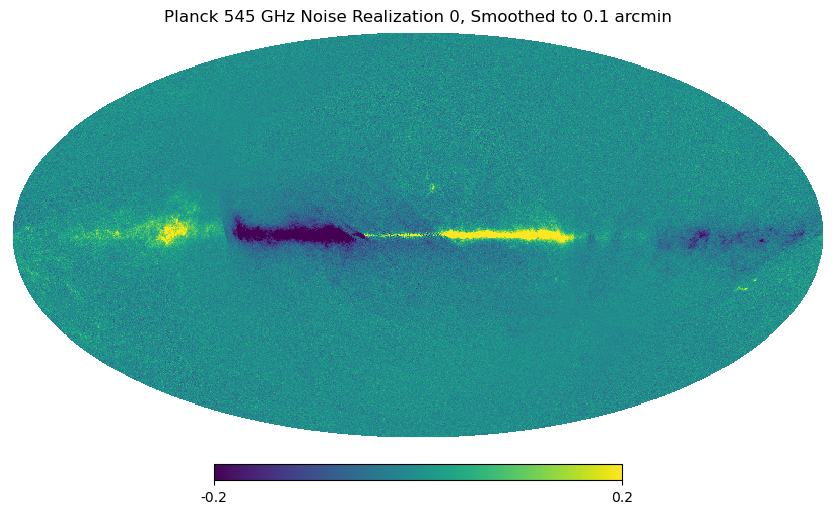

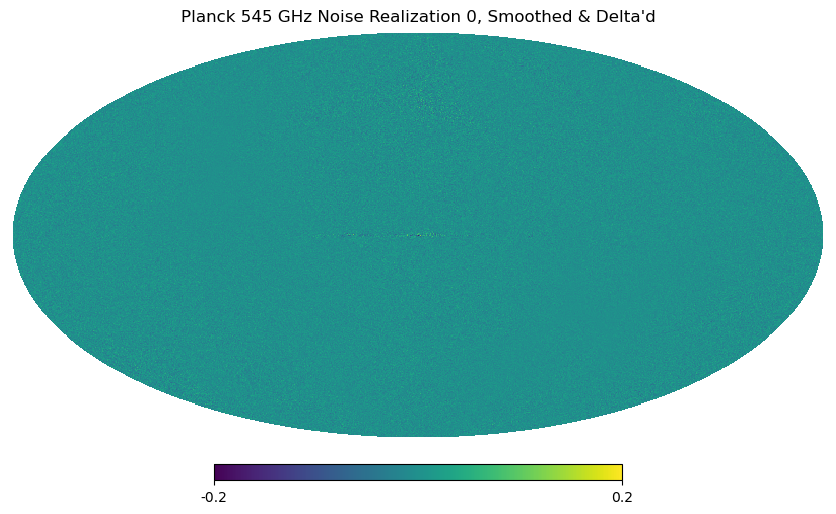

In [26]:
hp.mollview(nse0_sm1, title=f"Planck {DET} GHz Noise Realization 0, Smoothed to 0.1 arcmin", **min_max)
hp.mollview(nse0_sm1 - nse0, title=f"Planck {DET} GHz Noise Realization 0, Smoothed & Delta'd", **min_max)

In [27]:
nse0_sm5 = hp.smoothing(nse0, fwhm=np.radians(5/60))

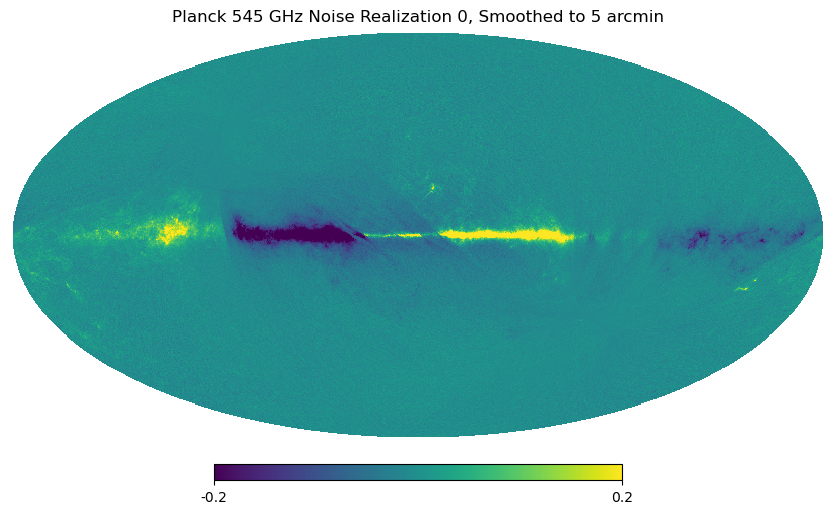

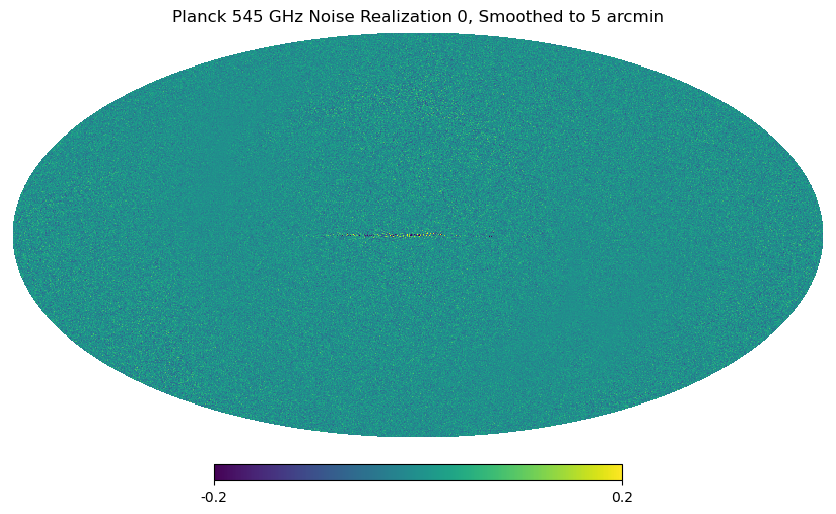

In [28]:
hp.mollview(nse0_sm5, title=f"Planck {DET} GHz Noise Realization 0, Smoothed to 5 arcmin", **min_max)
hp.mollview(nse0_sm5 - nse0, title=f"Planck {DET} GHz Noise Realization 0, Smoothed to 5 arcmin", **min_max)

In [29]:
nse0_sm10 = hp.smoothing(nse0, fwhm=np.radians(10/60))

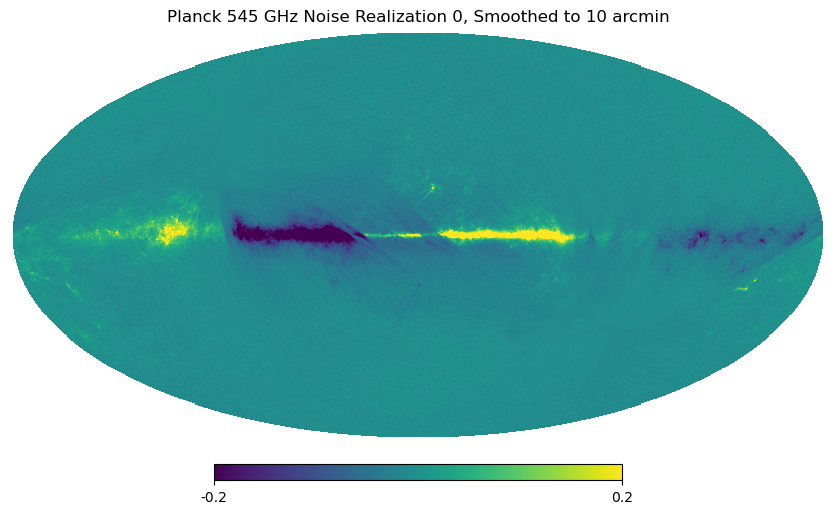

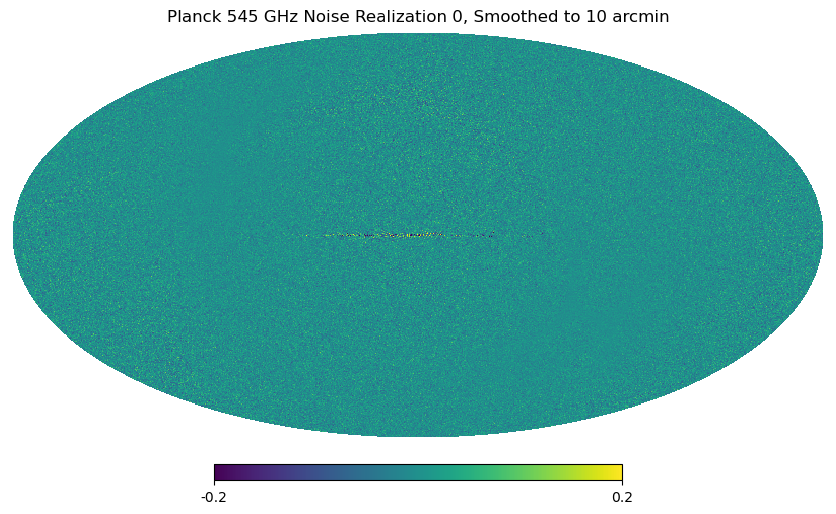

In [30]:
hp.mollview(nse0_sm10, title=f"Planck {DET} GHz Noise Realization 0, Smoothed to 10 arcmin", **min_max)
hp.mollview(nse0_sm10 - nse0, title=f"Planck {DET} GHz Noise Realization 0, Smoothed to 10 arcmin", **min_max)

In [31]:
NSIDE = 2048
N_NOISE_SIMS = 20
avg_noise_map = np.zeros(hp.nside2npix(NSIDE))
for i in range(N_NOISE_SIMS):
    nse_fn = get_planck_noise_data(detector=DET, assets_directory=NOISE_DIRECTORY, realization=i)
    nse = hp.read_map(nse_fn)
    avg_noise_map += nse / N_NOISE_SIMS

File /data/jim/CMB_Data/Assets/PlanckNoise/ffp10_noise_545_full_map_mc_00000.fits exists.
File /data/jim/CMB_Data/Assets/PlanckNoise/ffp10_noise_545_full_map_mc_00001.fits exists.
File /data/jim/CMB_Data/Assets/PlanckNoise/ffp10_noise_545_full_map_mc_00002.fits exists.
File /data/jim/CMB_Data/Assets/PlanckNoise/ffp10_noise_545_full_map_mc_00003.fits exists.
File /data/jim/CMB_Data/Assets/PlanckNoise/ffp10_noise_545_full_map_mc_00004.fits exists.
File /data/jim/CMB_Data/Assets/PlanckNoise/ffp10_noise_545_full_map_mc_00005.fits exists.
File /data/jim/CMB_Data/Assets/PlanckNoise/ffp10_noise_545_full_map_mc_00006.fits exists.
File /data/jim/CMB_Data/Assets/PlanckNoise/ffp10_noise_545_full_map_mc_00007.fits exists.
File /data/jim/CMB_Data/Assets/PlanckNoise/ffp10_noise_545_full_map_mc_00008.fits exists.
File /data/jim/CMB_Data/Assets/PlanckNoise/ffp10_noise_545_full_map_mc_00009.fits exists.
File /data/jim/CMB_Data/Assets/PlanckNoise/ffp10_noise_545_full_map_mc_00010.fits exists.
File /data

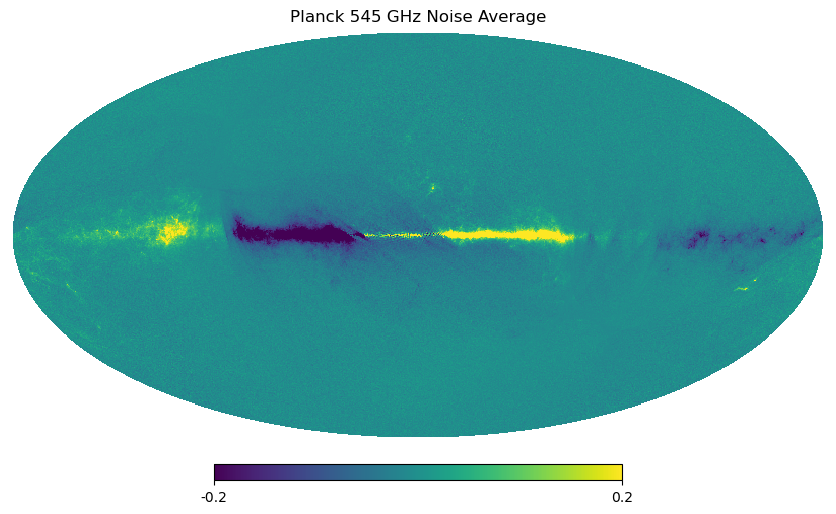

In [32]:
hp.mollview(avg_noise_map, title=f"Planck {DET} GHz Noise Average", **min_max)

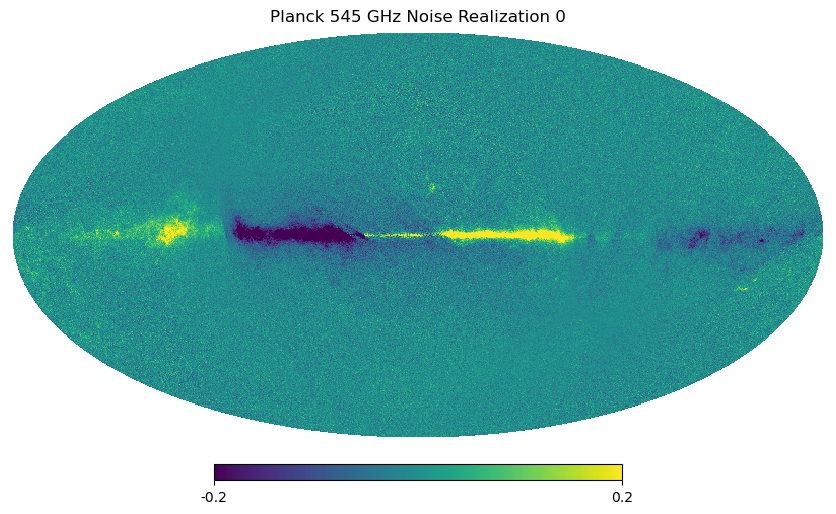

In [33]:
hp.mollview(nse0, title=f"Planck {DET} GHz Noise Realization 0", **min_max)

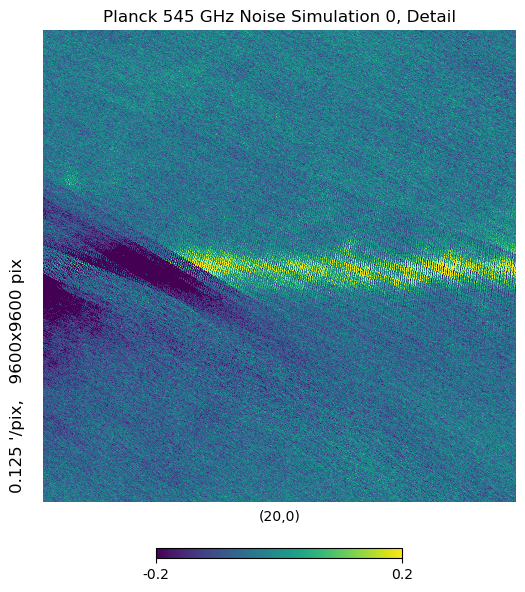

In [34]:
gnom_params = dict(rot=[20,0], xsize=9600, reso=0.125, **min_max)
hp.gnomview(nse0, title=f"Planck {DET} GHz Noise Simulation 0, Detail", **gnom_params)

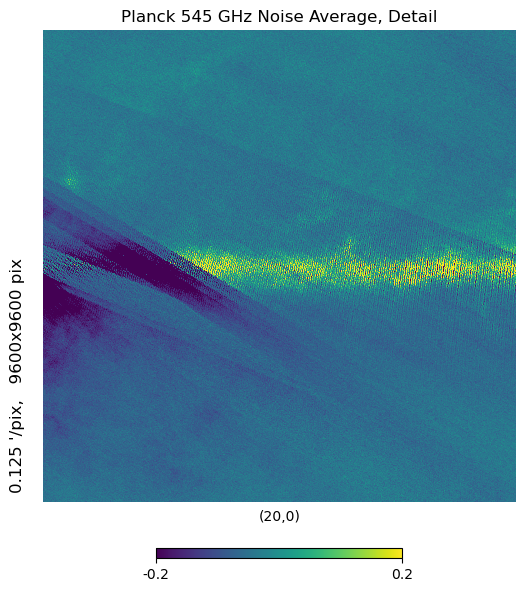

In [35]:
hp.gnomview(avg_noise_map, title=f"Planck {DET} GHz Noise Average, Detail", **gnom_params)

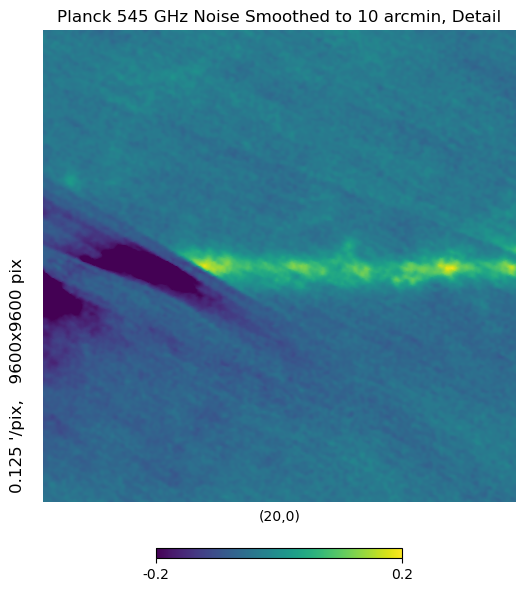

In [36]:
hp.gnomview(nse0_sm10, title=f"Planck {DET} GHz Noise Smoothed to 10 arcmin, Detail", **gnom_params)